# Halcyon - Aerospace Team Graz

Launched at EUROC'23, allowing the team to become the Overall Champions.
Permission to use flight data given by Dorothea Krasser, 2024.

These results were extracted out of the flight card:

1. Team number: `1`
2. Launch date: `October 13th, 2023. around 14hrs local time`
3. Last simulated apogee before flight: `3163 m` (this value differs from the simulation shown below because of the updates to rocketpy software)
4. Official recorded apogee: `3450 m`

The flight had a nominal ascend phase, but the main parachute deployed at apogee. 

In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
from rocketpy import Function,Environment, Flight, Rocket
from rocketpy.motors import CylindricalTank, Fluid, HybridMotor
from rocketpy.motors.tank import MassFlowRateBasedTank
import datetime 
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-colorblind")

In [44]:
tomorrow = datetime.date(2023,10,13) + datetime.timedelta(days=1)

Env = Environment(
    latitude=39.388692,
    longitude=-8.287814,
    elevation=130,
)

C:\Users\lucas\OneDrive\Documentos\GitHub\Rocketpy\RocketPy\rocketpy\mathutils\function.py:3125: UserWarning: Extrapolation method set to 'constant' because the linear method is not supported.
  warnings.warn(


The team preferred to set a custom atmospheric model. However, for better resolution, this examples will only run the windy atmosphere that was registered in windy. 

In [45]:
Env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))

Env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=None,
    temperature=300,
    wind_u=[(0, 8), (1000, 10)],
    wind_v=[(0, 0), (500, 0), (1600, 0)],
)


Gravity Details

Acceleration of gravity at surface level:    9.8008 m/s²
Acceleration of gravity at   1.000 km (ASL): 9.7981 m/s²


Launch Site Details

Launch Date: 2023-10-14 12:00:00 UTC
Launch Site Latitude: 39.38869°
Launch Site Longitude: -8.28781°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 44507.97 W    4373270.52 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 130.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 1.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 8.29 m/s
Surface Wind Direction: 270.00°
Surface Wind Heading: 90.00°
Surface Pressure: 997.99 hPa
Surface Temperature: 300.00 K
Surface Air Density: 1.159 kg/m³
Surface Speed of Sound: 347.22 m/s


Earth Model Details

Earth Radius at Launch site: 6369.57 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



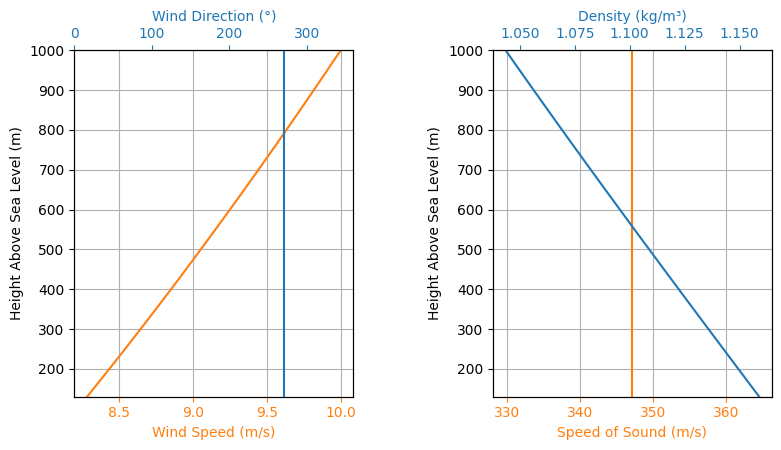

In [46]:
Env.info()

## Environment registered by windy


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at  14.014 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2023-10-13 13:00:00 UTC | 2023-10-13 14:00:00 Portugal
Launch Site Latitude: 39.38869°
Launch Site Longitude: -8.28781°
Reference Datum: WGS84
Launch Site UTM coordinates: 44507.97 W    4373270.52 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 161.0 m


Atmospheric Model Details

Atmospheric Model Type: Windy
Windy Maximum Height: 14.014 km

Surface Atmospheric Conditions

Surface Wind Speed: 3.37 m/s
Surface Wind Direction: 295.88°
Surface Wind Heading: 115.88°
Surface Pressure: 988.56 hPa
Surface Temperature: 291.48 K
Surface Air Density: 1.181 kg/m³
Surface Speed of Sound: 342.25 m/s


Earth Model Details

Earth Radius at Launch site: 6369.57 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



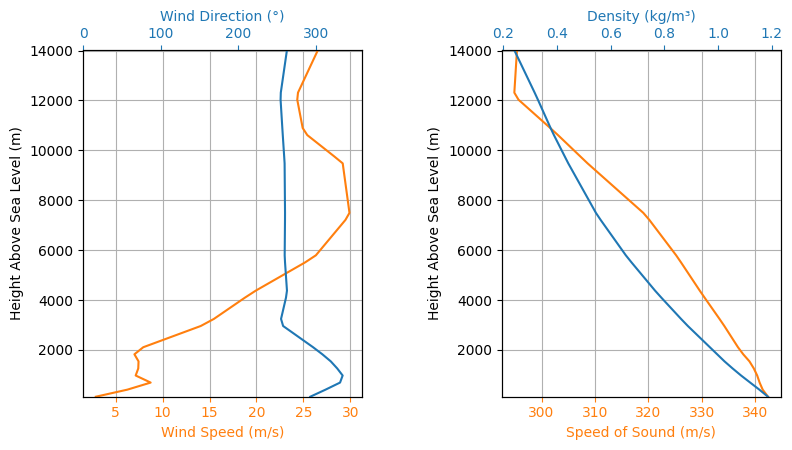

In [47]:
env = Environment(
    gravity=9.80665,
    date=(2023,10,13,14),
    latitude=39.388692,
    longitude=-8.287814,
    elevation=120,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(type="Windy", file="ECMWF")
env.info()

## Motor

In [20]:
oxidizer_liq = Fluid(name="N2O_l", density=960)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277)

tank_shape = CylindricalTank(70 / 1000, 320 / 1000)

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer_tank",
    geometry=tank_shape,
    flux_time=(5),
    initial_liquid_mass=4.2,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=4.2 / 5,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

hybrid_motor = HybridMotor(
    thrust_source="../../data/astg/engine_Halcyon_4thHotfire.eng",
    dry_mass=(3531 + 7139) / 1000,
    dry_inertia=(1.668, 1.668, 0.026),
    center_of_dry_mass_position=780 / 1000,
    burn_time=5,
    reshape_thrust_curve=False,
    grain_number=1,
    grain_separation=0,
    grain_outer_radius=43 / 1000,
    grain_initial_inner_radius=22.5 / 1000,
    grain_initial_height=310 / 1000,
    grain_density=920,
    nozzle_radius=0.0141,
    throat_radius=0.00677,
    interpolation_method="linear",
    grains_center_of_mass_position=385 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

hybrid_motor.add_tank(tank=oxidizer_tank, position=(792 + 285.5 / 2) / 1000)


Nozzle Details
Outlet Radius: 0.0141 m
Throat Radius: 0.00677 m
Outlet Area: 0.000625 m²
Throat Area: 0.000144 m²
Position: 0 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 920 kg/m3
Grain Outer Radius: 0.043 m
Grain Inner Radius: 0.0225 m
Grain Height: 0.31 m
Grain Volume: 0.001 m3
Grain Mass: 1.203 kg

Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 5.403 kg
Average Propellant Exhaust Velocity: 1805.600 m/s
Average Thrust: 1951.160 N
Maximum Thrust: 2127.473 N at 0.2503 s after ignition.
Total Impulse: 9755.800 Ns



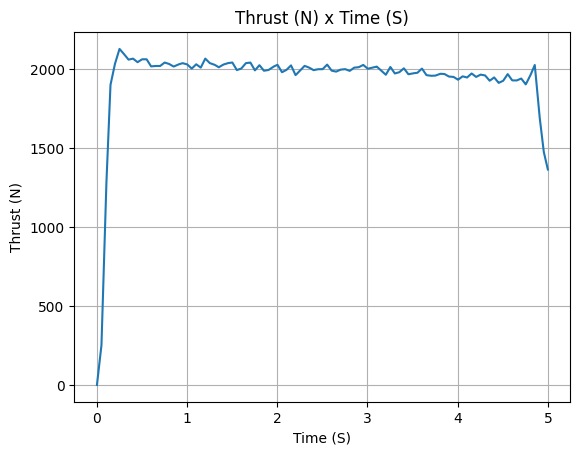

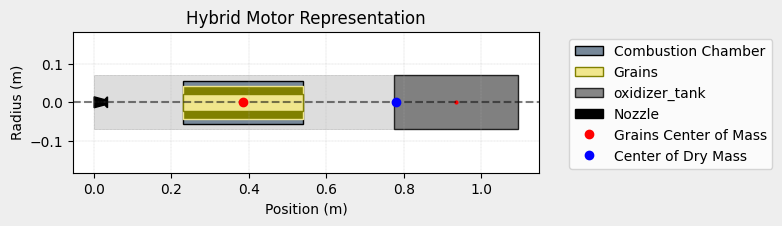

In [21]:
hybrid_motor.info()
hybrid_motor.draw()

## Rocket and Aerodynamic surfaces

In [36]:
# this drag curve comes from RASAero II
HALCYON = Rocket(
    radius=152.4 / 2000,
    mass=14613 / 1000,
    inertia=(24.56, 24.56, 70.074),
    center_of_mass_without_motor=2344 / 1000,
    power_off_drag="../../data/astg/DragCoeffOR_off.csv",
    power_on_drag="../../data/astg/DragCoeffOR_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

HALCYON.set_rail_buttons(0.29, 1.549)

HALCYON.add_motor(hybrid_motor, position=20 / 1000)

In [37]:
NoseCone = HALCYON.add_nose(
    length=0.46, 
    kind="vonKarman", 
    position=3556 / 1000
)

FinSet = HALCYON.add_trapezoidal_fins(
    n=4,
    span=0.125,
    root_chord=0.247,
    tip_chord=0.045,
    position=0.263,
)

Tail = HALCYON.add_tail(
    top_radius=152.4 / 2000, bottom_radius=0.0496, length=0.254, position=0.254
)

In [38]:
Main = HALCYON.add_parachute(
    name="Main",
    cd_s=9.621,
    trigger="apogee",
    sampling_rate=100,
    lag=5,
    noise=(0, 8.3, 0.5),
)


# Flight Simulation DATA

In [39]:
test_flight = Flight(
    rocket=HALCYON, 
    environment=Env, 
    inclination=85, 
    heading=90, 
    rail_length=12
)


Rail Departure State

Rail Departure Time: 0.666 s
Rail Departure Velocity: 32.618 m/s
Rail Departure Stability Margin: 3.085 c
Rail Departure Angle of Attack: 14.497°
Rail Departure Thrust-Weight Ratio: 6.857
Rail Departure Reynolds Number: 3.149e+05

Burn out State

Burn out time: 5.000 s
Altitude at burn out: 824.700 m (ASL) | 694.700 m (AGL)
Rocket speed at burn out: 278.969 m/s
Freestream velocity at burn out: 279.397 m/s
Mach Number at burn out: 0.805
Kinetic energy at burn out: 9.838e+05 J

Apogee State

Apogee Time: 26.869 s
Apogee Altitude: 3451.234 m (ASL) | 3321.234 m (AGL)
Apogee Freestream Speed: 11.510 m/s
Apogee X position: -74.160 m
Apogee Y position: -0.000 m
Apogee latitude: 39.3886920°
Apogee longitude: -8.2886771°

Impact Conditions

Time of impact: 467.202 s
X impact: 4159.564 m
Y impact: -0.004 m
Altitude impact: 130.000 m (ASL) | -0.000 m (AGL) 
Latitude: 39.3886819°
Longitude: -8.2394012°
Vertical velocity at impact: -6.668 m/s
Number of parachutes triggered un

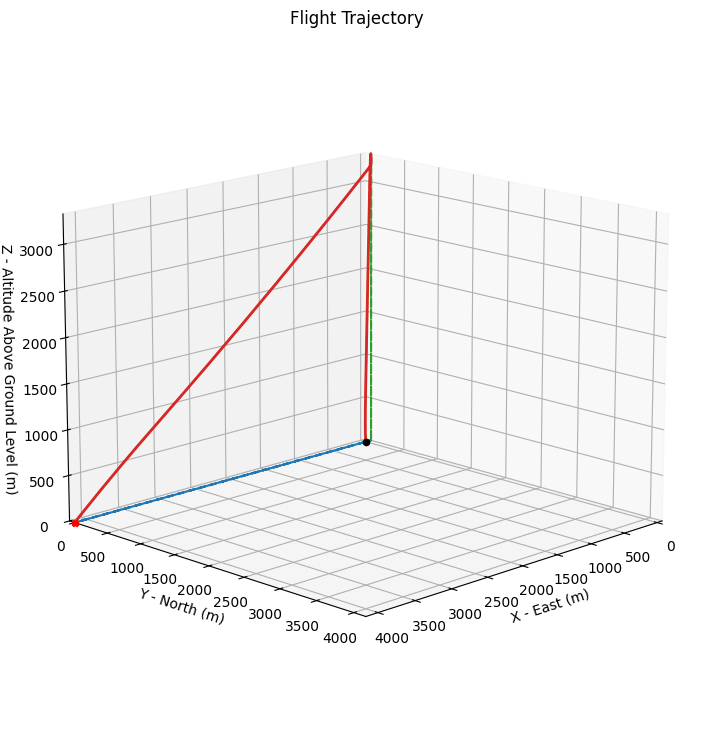

In [40]:
test_flight.prints.out_of_rail_conditions()
test_flight.prints.burn_out_conditions()
test_flight.prints.apogee_conditions()
test_flight.prints.impact_conditions()
test_flight.plots.trajectory_3d()

# Data analysis

In [55]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter


columns_map = {
    "ts": "time",
    "filtered_altitude_AGL":"altitude" ,
    "filtered_acceleration":"az" ,
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/astg/altimeter_halcyon.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'az']


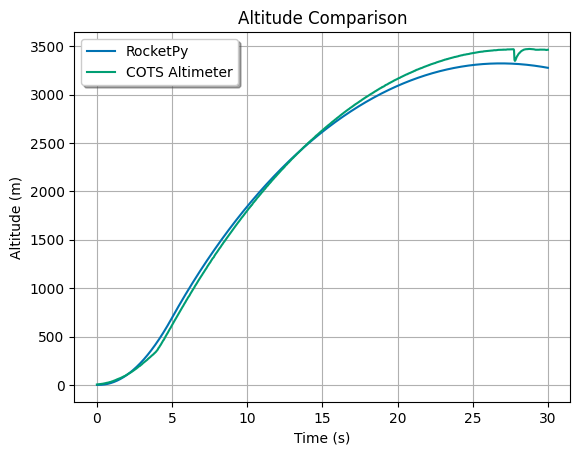

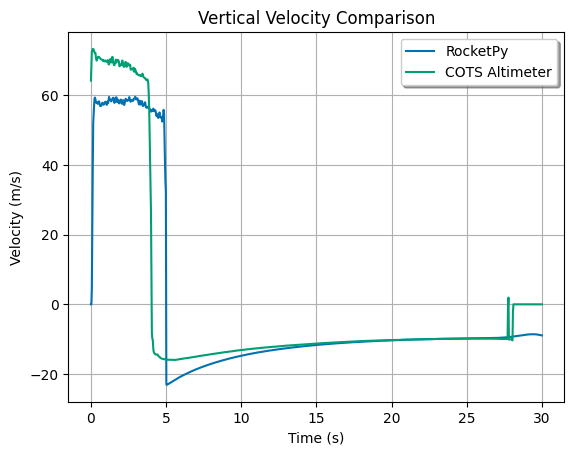

In [56]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
    lower=0,
    upper=30,
)
Function.compare_plots(
    [
        (test_flight.az, "RocketPy"),
        (cots_altimeter_flight.az, "COTS Altimeter"),
    ],
    title="Vertical Acceleration Comparison",
    xlabel="Time (s)",
    ylabel="Acceleration (m/s)",
    lower=0,
    upper=30,
)

In [58]:
columns_map = {
    "time": "time",
    "altitude": "vz",
    "LAT": "latitude",
    "LON": "longitude",
}

cots_gnss_flight = FlightDataImporter(
    name="COTS GNSS Flight",
    paths="../../data/juno3/cots_GNSS.csv",
    columns_map=columns_map,
    units=units,
    interpolation="linear",
    extrapolation="zero",
    separator=",",
    encoding="utf-8",
)

Attribute 'z' converted from ft to SI
Attribute 'vz' converted from ft/s to SI
The following attributes were create and are now available to be used:  ['z', 'vz', 'latitude', 'longitude']


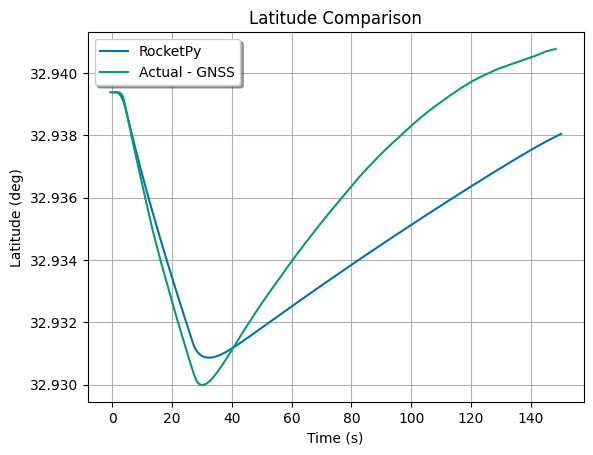

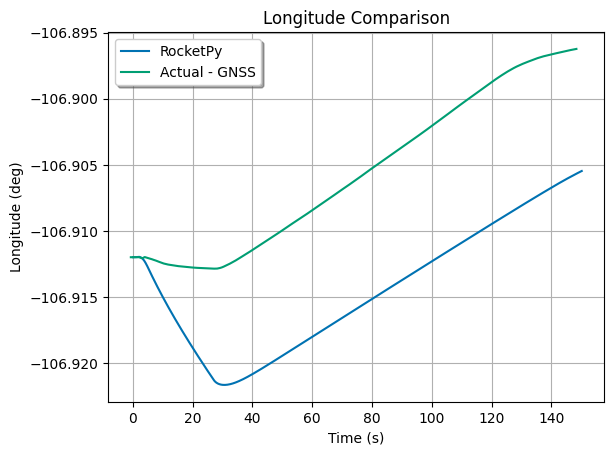

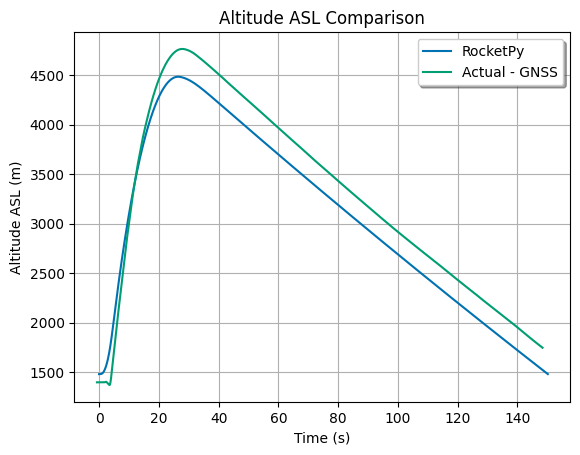

In [59]:
Function.compare_plots(
    [(test_flight.latitude, "RocketPy"), (cots_gnss_flight.latitude, "Actual - GNSS")],
    title="Latitude Comparison",
    xlabel="Time (s)",
    ylabel="Latitude (deg)",
)
Function.compare_plots(
    [
        (test_flight.longitude, "RocketPy"),
        (cots_gnss_flight.longitude, "Actual - GNSS"),
    ],
    title="Longitude Comparison",
    xlabel="Time (s)",
    ylabel="Longitude (deg)",
)
Function.compare_plots(
    [(test_flight.z, "RocketPy"), (cots_gnss_flight.z, "Actual - GNSS")],
    title="Altitude ASL Comparison",
    xlabel="Time (s)",
    ylabel="Altitude ASL (m)",
)